# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [27]:
#Imports
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import statsmodels.stats.weightstats as ws

from matplotlib import pyplot
%matplotlib inline

# Formats my Pandas DataFrames to be more readable
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css)) 

In [28]:
# Imports the body temperature data from the study and stores it as data
data = pd.read_csv('data/human_body_temperature.csv')

Below is an initial survey of the data indicates. Notice the table stores the temperature, gender, and heart rate per participant. I also found a few summary statistics on the data: the count, mean, standard deviation, min, max, and quartiles.

In [29]:
data.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [30]:
data.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [31]:
# For all hypothesis tests in this analysis, my alpha level will be 0.05. 
alpha = 0.05 

# 1) Is the distribution of body temperatures normal? 

Looking at the histogram of the temperatures below, it appears to be a normal distribution. I will then evaluate this claim further by hypothesis testing below to make sure. 

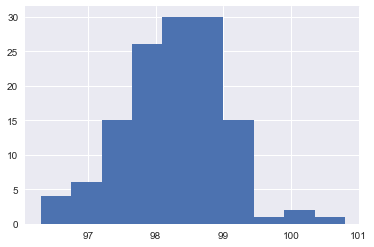

In [32]:
data.temperature.hist()

## **  Normal Distribution Test **

**Null hypothesis**: Human body temperature is normally distributed in the population.

**Alternative hypothesis**: Human body temperature is not normally distributed in the population.

In [33]:
chi,p = stats.mstats.normaltest(data.temperature)
(chi,p)

print("chi = " + str(chi) + " and p = "+ str(p))

print(" ")

if(p < alpha): 
    print("I reject the null.")
else: 
    print("I fail to the reject the null.")

chi = 2.70380143332 and p = 0.258747986349
 
I fail to the reject the null.


# 2) Is the sample size large? Are the observations independent?

In the line below, one can see that 130 temperatures were read, so this is a large enough data set. I then tested to see whether the temperature is independend of gender through a two-sample t test on male and female temperatures. Finally, I determined whether thers is a correlation between body temperature and heart rate. 

In [34]:
print( str(len(data)) + " temperatures were read.")

130 temperatures were read.


In [35]:
# Makes sub-DataFrames for males and females
males = data[data['gender']=='M']
females = data[data['gender']=='F']

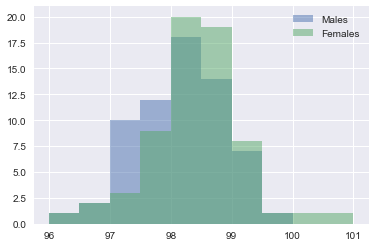

In [36]:
# Plots a histogram to see whether there is an easily discernable difference between body temperature by gender
bins = np.linspace(96, 101, 11)

pyplot.hist(males.temperature, bins, alpha=0.5, label='Males')
pyplot.hist(females.temperature, bins, alpha=0.5, label='Females')
pyplot.legend(loc='upper right')
pyplot.show()

In [37]:
# Displays the means for males and females
pd.DataFrame({'Gender': ['Males', 'Females'], 'Sample Mean Body Temperature': [males.temperature.mean(), females.temperature.mean()]})

,Gender,Sample Mean Body Temperature
0,Males,98.104615
1,Females,98.393846


## ** Gender Independence Test **

On first appearance, it seems like there is no major difference in the histograms. Upon closer inspection from the graph, however, females may have a slightly higher body temperature than men. The sample mean for females is also higher than for males. Whether there is a difference will be tested by a two-sided t-test. (Note: This also addresses question 5 above.) 

I am ultimately interested in being able to conclude whether temperature is likely dependent on gender. Thus, I am interested in determining whether there is a difference in male and female mean temperatures, since any difference (greater or less) would indicate dependence on gender. Hence, I am interested in a two-sample, two-sided t-test. 

**Null Hypothesis**: There is no difference in mean body temperature between females and males in the population. (By implication, body temperature is independent of gender.) 

**Alternative Hypothesis**: There is a difference in mean body temperature between females and males in the population. (By implication, body temperature is dependent on gender.) 

In [38]:
# Conducts the two-sided t test on the male and female populations
t, p = stats.ttest_ind(males.temperature, females.temperature)
(t, p)

print("t = " + str(t) + " and p = "+ str(p))

print(" ")

if(p < alpha): 
    print("I reject the null.")
else: 
    print("I fail to the reject the null.")

t = -2.28543453817 and p = 0.0239318831224
 
I reject the null.


I must conclude that there may be a statistically significant difference between men and women. I must reject the hypothesis that body temperature is independent of gender in the population. 

## Heart Rate Test

Below I will determine whether body temperature is independent on heart rate or the direction of any correlation. Glancing at the scatter plot below, it does not appear to have a correlation. I added a line of best fit, and I tested the correlation strength to make sure.

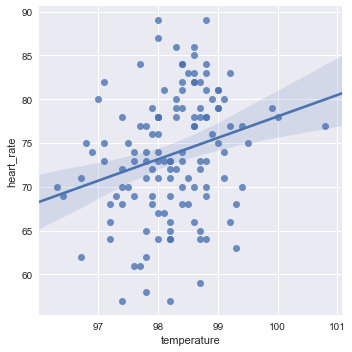

In [39]:
sns.lmplot(x='temperature',y='heart_rate',data=data,fit_reg=True)

The line of best fit is positive, although clearly the data is scattered pretty half-hazardly across. Below is the correlation coefficient to determine whether this potential positive correlation is significant: 

In [40]:
print("Correlation Coefficient: " + str(data.corr().heart_rate.temperature))

Correlation Coefficient: 0.253656402721


This correlation coefficient is positive but low. Thus we can conclude that there may be a weak positive correlation between body temperature and heart rate. 

To determine whether gender influences the relationship between body temperature and heart rate, I conducted a similar test on both the male and female subpopulations: 

** Males **

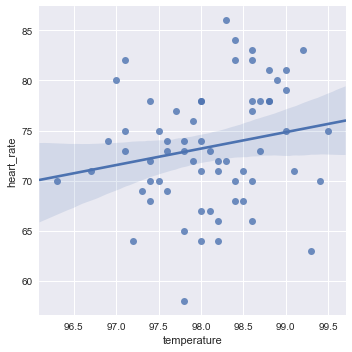

In [41]:
sns.lmplot(x='temperature',y='heart_rate',data=males,fit_reg=True)

In [42]:
print("Male Correlation Coefficient: " + str(males.corr().heart_rate.temperature))

Male Correlation Coefficient: 0.195589375097


** Females **

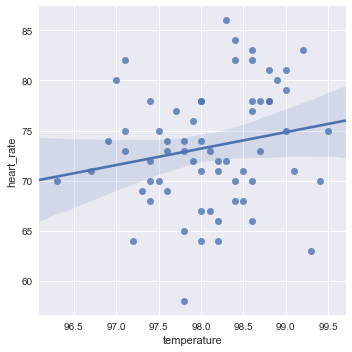

In [43]:
sns.lmplot(x='temperature',y='heart_rate',data=males,fit_reg=True)

In [44]:
print("Female Correlation Coefficient: " + str(females.corr().heart_rate.temperature))

Female Correlation Coefficient: 0.286931154497


Note that for the female population, the correlation between body temperature and heart rate is noticeably higher (0.287 compared with 0.196). Further testing would reveal how significant this difference is, and why it might be the case.  

I will not conduct a t-test on heart rate by gender to determine whether there is a noticeable difference in the heart rate means between males and females. Given that gender does seem to influence the body temperature, a relationship between gender and heart rate could partially explain the weak correlation between heart rate and body temperature. 

In [45]:
pd.DataFrame({'Gender': ['Males', 'Females'], 'Sample Mean Heart Rate': [males.heart_rate.mean(), females.heart_rate.mean()]})

,Gender,Sample Mean Heart Rate
0,Males,73.369231
1,Females,74.153846


Notice that in the sample, females have a higher heart rate than males. We will test whether they are different in the population. 

**Null Hypothesis**: There is no difference in mean heart rate between females and males in the population. 

**Alternative Hypothesis**: There is a difference in mean heart rate between females and males in the population. 

In [46]:
# Conducts the two-sided t test on the heart rate of the male and female populations
t, p = stats.ttest_ind(males.heart_rate, females.heart_rate)
(t, p)

print("t = " + str(t) + " and p = "+ str(p))

print(" ")

if(p < alpha): 
    print("I reject the null.")
else: 
    print("I fail to the reject the null.")

t = -0.631906102474 and p = 0.528575239707
 
I fail to the reject the null.


We can thus conclude that there is not likely a difference between mean heart rates of the genders in the population. Thus, we can conclude that heart rate is most likely independent of gender. Also, any influence heart rate has on body temperature is not likely caused by an underlying gender difference.

## Conclusion on Independence
Body temperature is likely dependent on gender and may possess a weak positive correlation with heart rate. Women seem to have a slightly stronger correlation between body temperature and heart rate than men. Thus, we cannot conclude that body temperature is independent. 

I hypothesize that the higher body temperature of females is due to the fact that on average, females are physically smaller than men. This could decrease the energy needed to maintain a higher body temperature. The stronger correlation between heart rate and body temperature for women than for men may also connect with smaller body size, which could increase the degree to which an increase in blood circulation would generate heat. We do not have enough data on this, but further tests on the influence of size, body mass on body temperature, and body type on body temperature could test this hypothesis.

# 3) Is the true population mean really 98.6 degrees F?

In [47]:
print("Sample Body Temperature Mean: " + str(data.temperature.mean()))

Sample Body Temperature Mean: 98.24923076923078


Our sample mean is 98.2. We will use a one-sample t test to test the likeliness that the population mean is 98.6. This will be two-tailed because we are interested in whether it is 98.2 not, whether it is at least or at most 98.6 degrees. 

** Null Hypothesis: ** The population body temperature mean is 98.6. 

** Alternative Hypothesis: ** The population body temperature mean is not 98.6. 

In [48]:
z, p = ws.ztest(data.temperature, value = 98.6)

print("z = " + str(z) + " and p = "+ str(p))
print(" ")

if(p < alpha): 
    print("I reject the null.")
else: 
    print("I fail to the reject the null.")

z = -5.45482329236 and p = 4.9021570141e-08
 
I reject the null.


This is a really small p-value. Thus I conclude that the population mean is most likely not 98.6. 

I will also try a t-test to compare conclusions: 

In [49]:
t, p = stats.ttest_1samp(a = data.temperature, popmean = 98.6)

print("t = " + str(t) + " and p = "+ str(p))
print(" ")

if(p < alpha): 
    print("I reject the null.")
else: 
    print("I fail to the reject the null.")

t = -5.45482329236 and p = 2.41063204156e-07
 
I reject the null.


Again, I have a really small p-value, so I am forced to reject the null. The population mean is most likely not 98.6 degrees Fahrenheit. 

I will construct a 95% confidence interval for the population body temperature mean to help understand where the population mean likely falls. 

In [50]:
conf_int = stats.norm.interval(1-alpha, loc=data.temperature.mean(), scale=data.temperature.std())
conf_int

(96.812218185403111, 99.686243353058444)

We can conclude the population mean body temperature is has a 95% chance of being between 96.8 and 99.7. 

# 4) At what temperature should we consider someone's temperature to be "abnormal"?

I will presume that someone's temperature could be considered abnormal if it fell above or below a certain percentile. For me, if would be abnormal if it fall in the lowest 2.5% or highest 97.5% (given our alpha-level of 0.05). This criteria may change given one's intent and preferences, so I calculated a table of potential percentiles below. 

I also determined similar abnormality figures for males and females, so one could make an assessment for an abnormal temperature for each subgroup, given gender's potentia influence over body temperature. 

In [51]:
criteria = [.01, .05, .1, .15, .2, .25]
percentiles_max = []
percentiles_min = []
percentiles_max_males = []
percentiles_min_males = []
percentiles_max_females = []
percentiles_min_females = []
for c in criteria: 
    percentiles_max.append(data.temperature.quantile(1-c/2))
    percentiles_min.append(data.temperature.quantile(c/2))
    percentiles_max_males.append(males.temperature.quantile(1-c/2))
    percentiles_min_males.append(males.temperature.quantile(c/2))
    percentiles_max_females.append(females.temperature.quantile(1-c/2))
    percentiles_min_females.append(females.temperature.quantile(c/2))
    

abnormalities_table = pd.DataFrame({'Criteria': criteria, 'Either Gender: Temperature Above': percentiles_max, 'Either Gender: Temperature Below': percentiles_min, 'Males: Temperature Above': percentiles_max_males, 'Males: Temperature Below': percentiles_min_males, 'Females: Temperature Above': percentiles_max_females, 'Females: Temperature Below': percentiles_min_females})
abnormalities_table

,Criteria,Either Gender: Temperature Above,Either Gender: Temperature Below,Females: Temperature Above,Females: Temperature Below,Males: Temperature Above,Males: Temperature Below
0,0.01,100.2840,96.3645,100.544,96.496,99.468,96.428
1,0.05,99.4775,96.7225,99.940,96.760,99.340,96.820
2,0.10,99.3000,97.0450,99.380,97.200,99.180,97.020
3,0.15,99.2000,97.1675,99.220,97.360,99.020,97.100
4,0.20,99.1000,97.2900,99.160,97.640,99.000,97.140
5,0.25,99.0000,97.4000,99.100,97.700,98.900,97.300


Above are the abnormal temperatures for various percentile criteria for what constitutes an abnormality. If our criteria is 5%, we would consider temperatures whose percentile is 2.5% or lower, or whose percentile is 97.5% or higher. That corresponds with a body temperature lower than 96.7225 and above 99.4475 degrees Fahrenheit. 